In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
df = pd.read_csv("auto-mpg.csv")

# Creating copy
df_copy = df.copy()

In [2]:
# Handle non-numeric values in 'horsepower'
df_copy["horsepower"] = df_copy["horsepower"].replace('?', np.nan)
df_copy.dropna(subset=["horsepower"], inplace=True)
df_copy["horsepower"] = df_copy["horsepower"].astype(float)

In [3]:
# Feature Engineering
df_copy['displacement_on_power'] = df_copy['displacement'] / df_copy['horsepower']
df_copy['weight_on_cylinder'] = df_copy['weight'] / df_copy['cylinders']
df_copy['acceleration_on_power'] = df_copy['acceleration'] / df_copy['horsepower']
df_copy['acceleration_on_cylinder'] = df_copy['acceleration'] / df_copy['cylinders']

In [4]:
# Define features and target
features = [
    "cylinders", "displacement", "horsepower", "weight", "acceleration", "model year",
    'displacement_on_power', 'weight_on_cylinder', 'acceleration_on_power', 'acceleration_on_cylinder'
]
X = df_copy[features]
y = df_copy["mpg"]

In [5]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [6]:
# Predict and evaluate
y_pred = model.predict(X_test)

print("🔹 Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("🔹 Root MSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("🔹 R² Score:", r2_score(y_test, y_pred))

🔹 Mean Squared Error (MSE): 8.365362488299468
🔹 Root MSE: 2.89229363797998
🔹 R² Score: 0.836103704987335


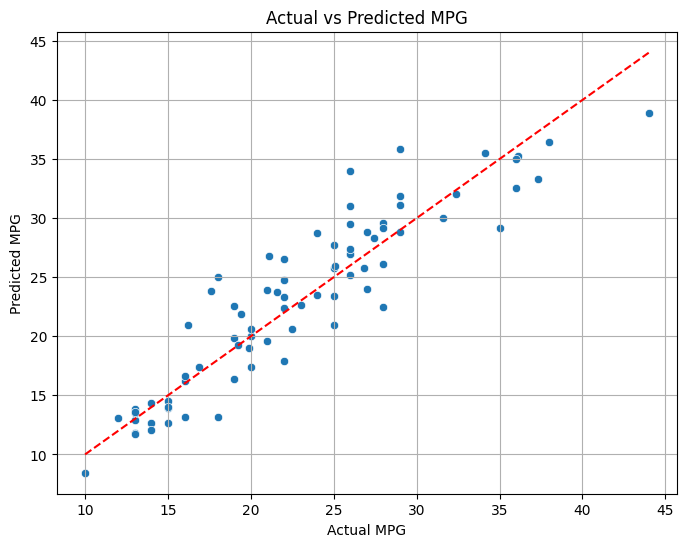

In [7]:
# Visualize actual vs predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual MPG")
plt.ylabel("Predicted MPG")
plt.title("Actual vs Predicted MPG")
plt.grid(True)
plt.show()

In [8]:
cylinders = float(input("Enter number of cylinders: "))
displacement = float(input("Enter engine displacement: "))
horsepower = float(input("Enter horsepower: "))
weight = float(input("Enter weight (lbs): "))
acceleration = float(input("Enter acceleration (0-60 time): "))
model_year = float(input("Enter model year (e.g., 82 for 1982): "))

# Step 2: Create DataFrame
new_car = pd.DataFrame({
    "cylinders": [cylinders],
    "displacement": [displacement],
    "horsepower": [horsepower],
    "weight": [weight],
    "acceleration": [acceleration],
    "model year": [model_year]
})

new_car["displacement_on_power"] = new_car["displacement"] / new_car["horsepower"]
new_car["weight_on_cylinder"] = new_car["weight"] / new_car["cylinders"]
new_car["acceleration_on_power"] = new_car["acceleration"] / new_car["horsepower"]
new_car["acceleration_on_cylinder"] = new_car["acceleration"] / new_car["cylinders"]

# Step 3: Predict using the trained model
predicted_mpg = model.predict(new_car)

# Step 4: Display prediction
print(f"Predicted MPG: {predicted_mpg}")


Predicted MPG: [-1377.55803012]
